In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

In [2]:
# This can help keep the notebook output clean
warnings.filterwarnings("ignore")

In [76]:
training_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
output_data = pd.read_csv('gender_submission.csv')

## basic information about data

In [79]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
training_data.shape

(891, 12)

In [83]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [85]:
test_data.shape

(418, 11)

In [87]:
output_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [89]:
output_data.shape

(418, 2)

In [91]:
# Count the number of null values in each column
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Eliminate Irrelevant column

In [96]:
#cabin must be deleted as it has 687/891 values NULL.

In [98]:
# Create a new feature 'Family_size' by summing the number of siblings/spouses (SibSp) and parents/children (Parch),
# and adding 1 to account for the passenger themselves.
training_data['Family_size']=training_data['SibSp'] + training_data['Parch'] + 1
# Drop columns that are no longer needed for analysis or modeling
training_data.drop(columns=['PassengerId','Name','Parch','SibSp','Ticket','Cabin'],inplace=True)

In [100]:
# same for test data as well
test_data['Family_size']=test_data['SibSp'] + test_data['Parch'] + 1
test_data.drop(columns=['PassengerId','Name','Parch','SibSp','Ticket','Cabin'],inplace=True)

## Handling null(zero) values

In [104]:
# Fill missing values in the 'Age' and 'Fare' column with the mean age of the dataset.
training_data['Age'].fillna(training_data['Age'].mean(), inplace=True)
training_data['Fare'].fillna(training_data['Fare'].mean(), inplace=True)

# Fill missing values in the 'Embarked' column with 'S' (Southampton), which is the most common embarkation port.
training_data['Embarked'].fillna('S',inplace=True)

In [106]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
test_data['Embarked'].fillna('S',inplace=True)

In [108]:
training_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


## Graphical Representation

<Axes: xlabel='Sex', ylabel='count'>

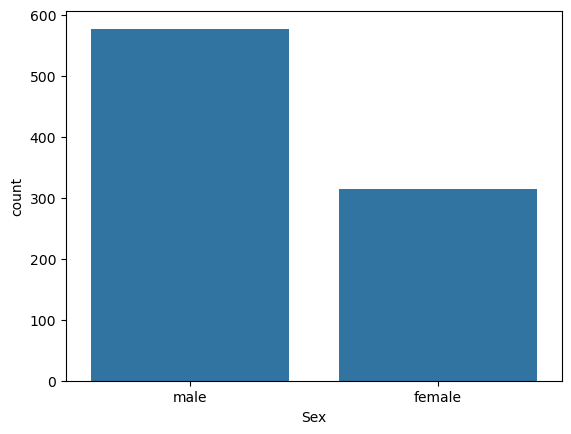

In [111]:
sns.countplot(x='Sex',data=training_data)

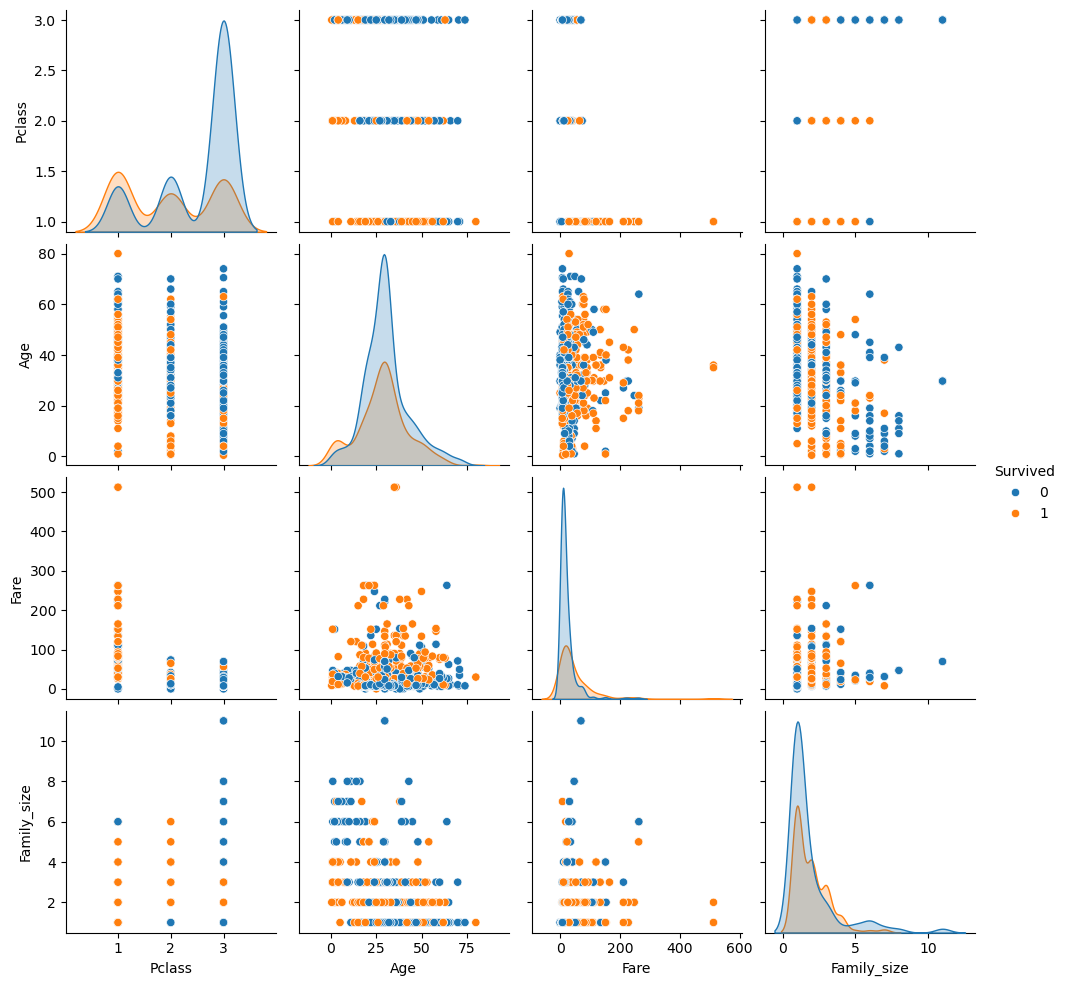

In [113]:
# This pairplot displays scatter plots for all pairs of features in the DataFrame `df`
sns.pairplot(training_data,hue='Survived')

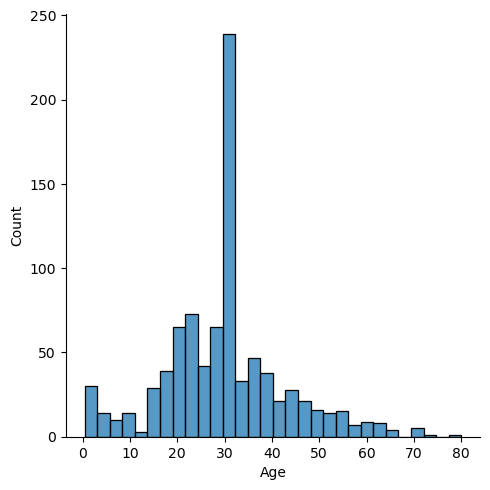

In [114]:
sns.displot(data=training_data, x='Age', kind='hist')

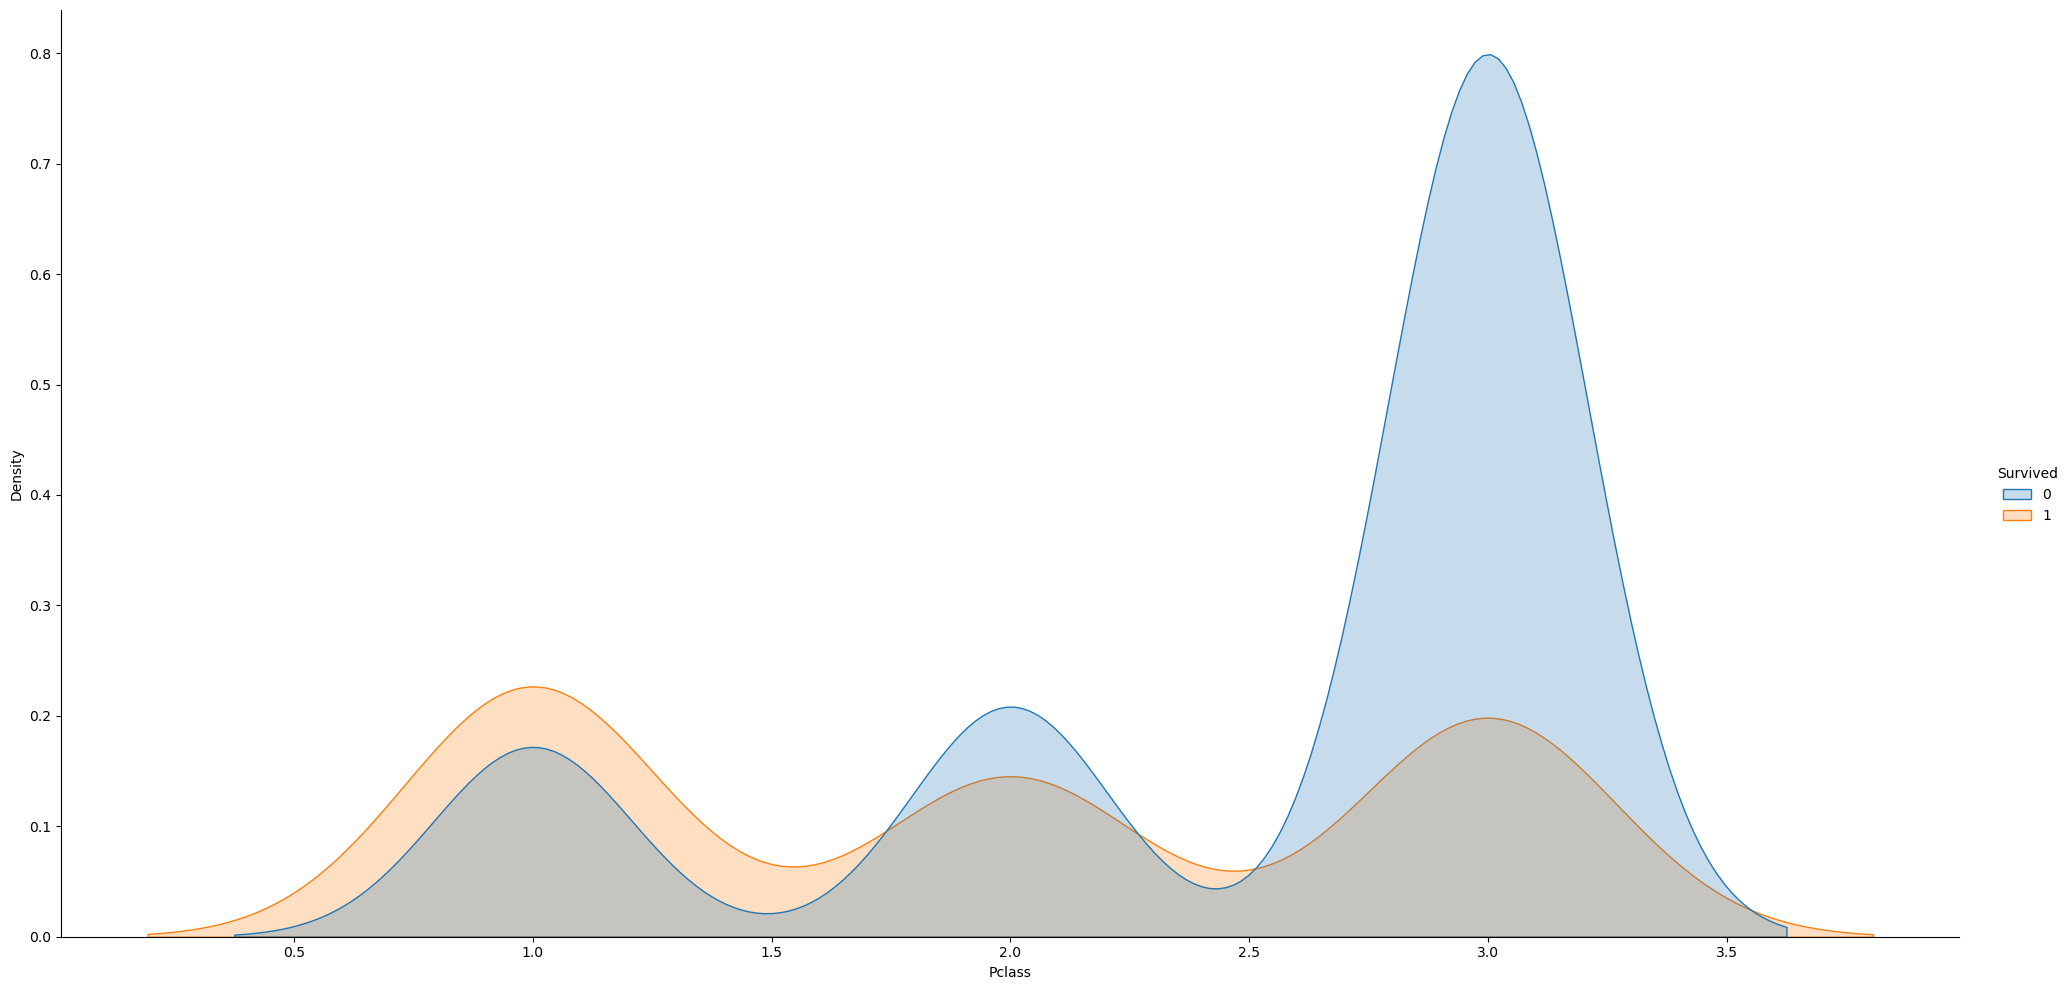

In [117]:
sns.displot(data=training_data,x='Pclass',kind='kde',hue='Survived',fill=True,height=10,aspect=2)

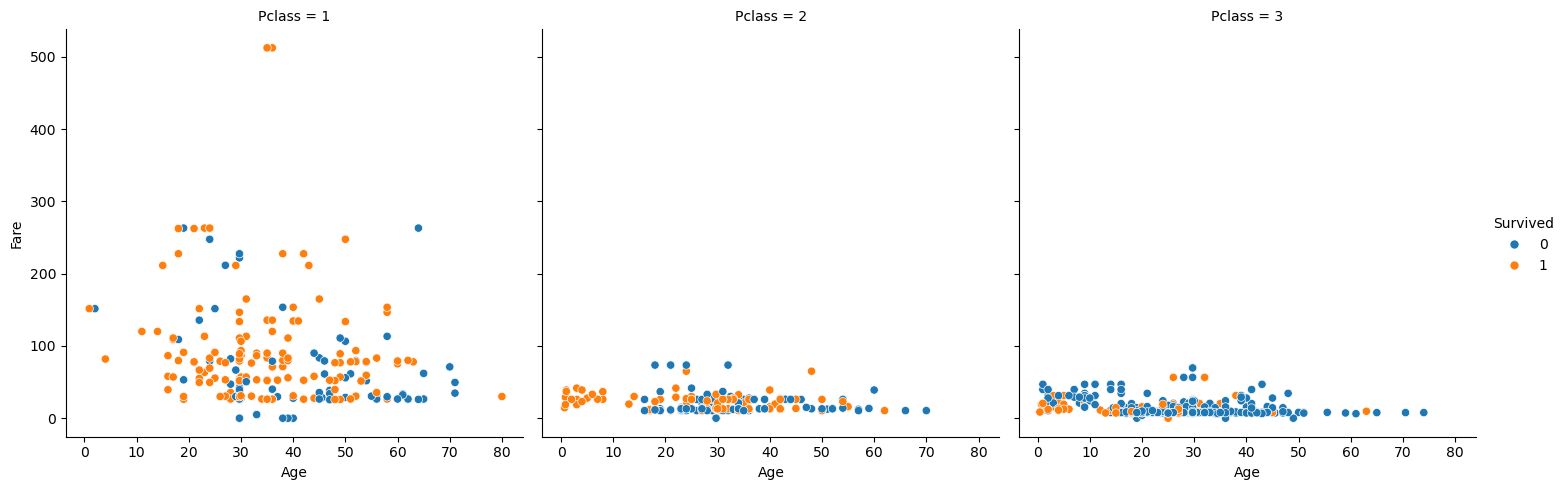

In [119]:
sns.relplot(data=training_data, x='Age', y='Fare', kind='scatter', hue='Survived',col='Pclass')

## Handeling Categorical Data

In [122]:
# Print unique values for each column having data type object
for col in training_data:
    if training_data[col].dtype == 'O':
        print(f"Unique values in '{col}':")
        print(pd.unique(training_data[col]))
        print()

Unique values in 'Sex':
['male' 'female']

Unique values in 'Embarked':
['S' 'C' 'Q']



In [124]:
training_data = pd.get_dummies(training_data,columns=['Sex','Embarked'],drop_first=True,dtype=int)

In [126]:
test_data = pd.get_dummies(test_data,columns=['Sex','Embarked'],drop_first=True,dtype=int)

In [128]:
training_data.head()

,Survived,Pclass,Age,Fare,Family_size,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,1,0,1
1,1,1,38.0,71.2833,2,0,0,0
2,1,3,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,2,0,0,1
4,0,3,35.0,8.0500,1,1,0,1


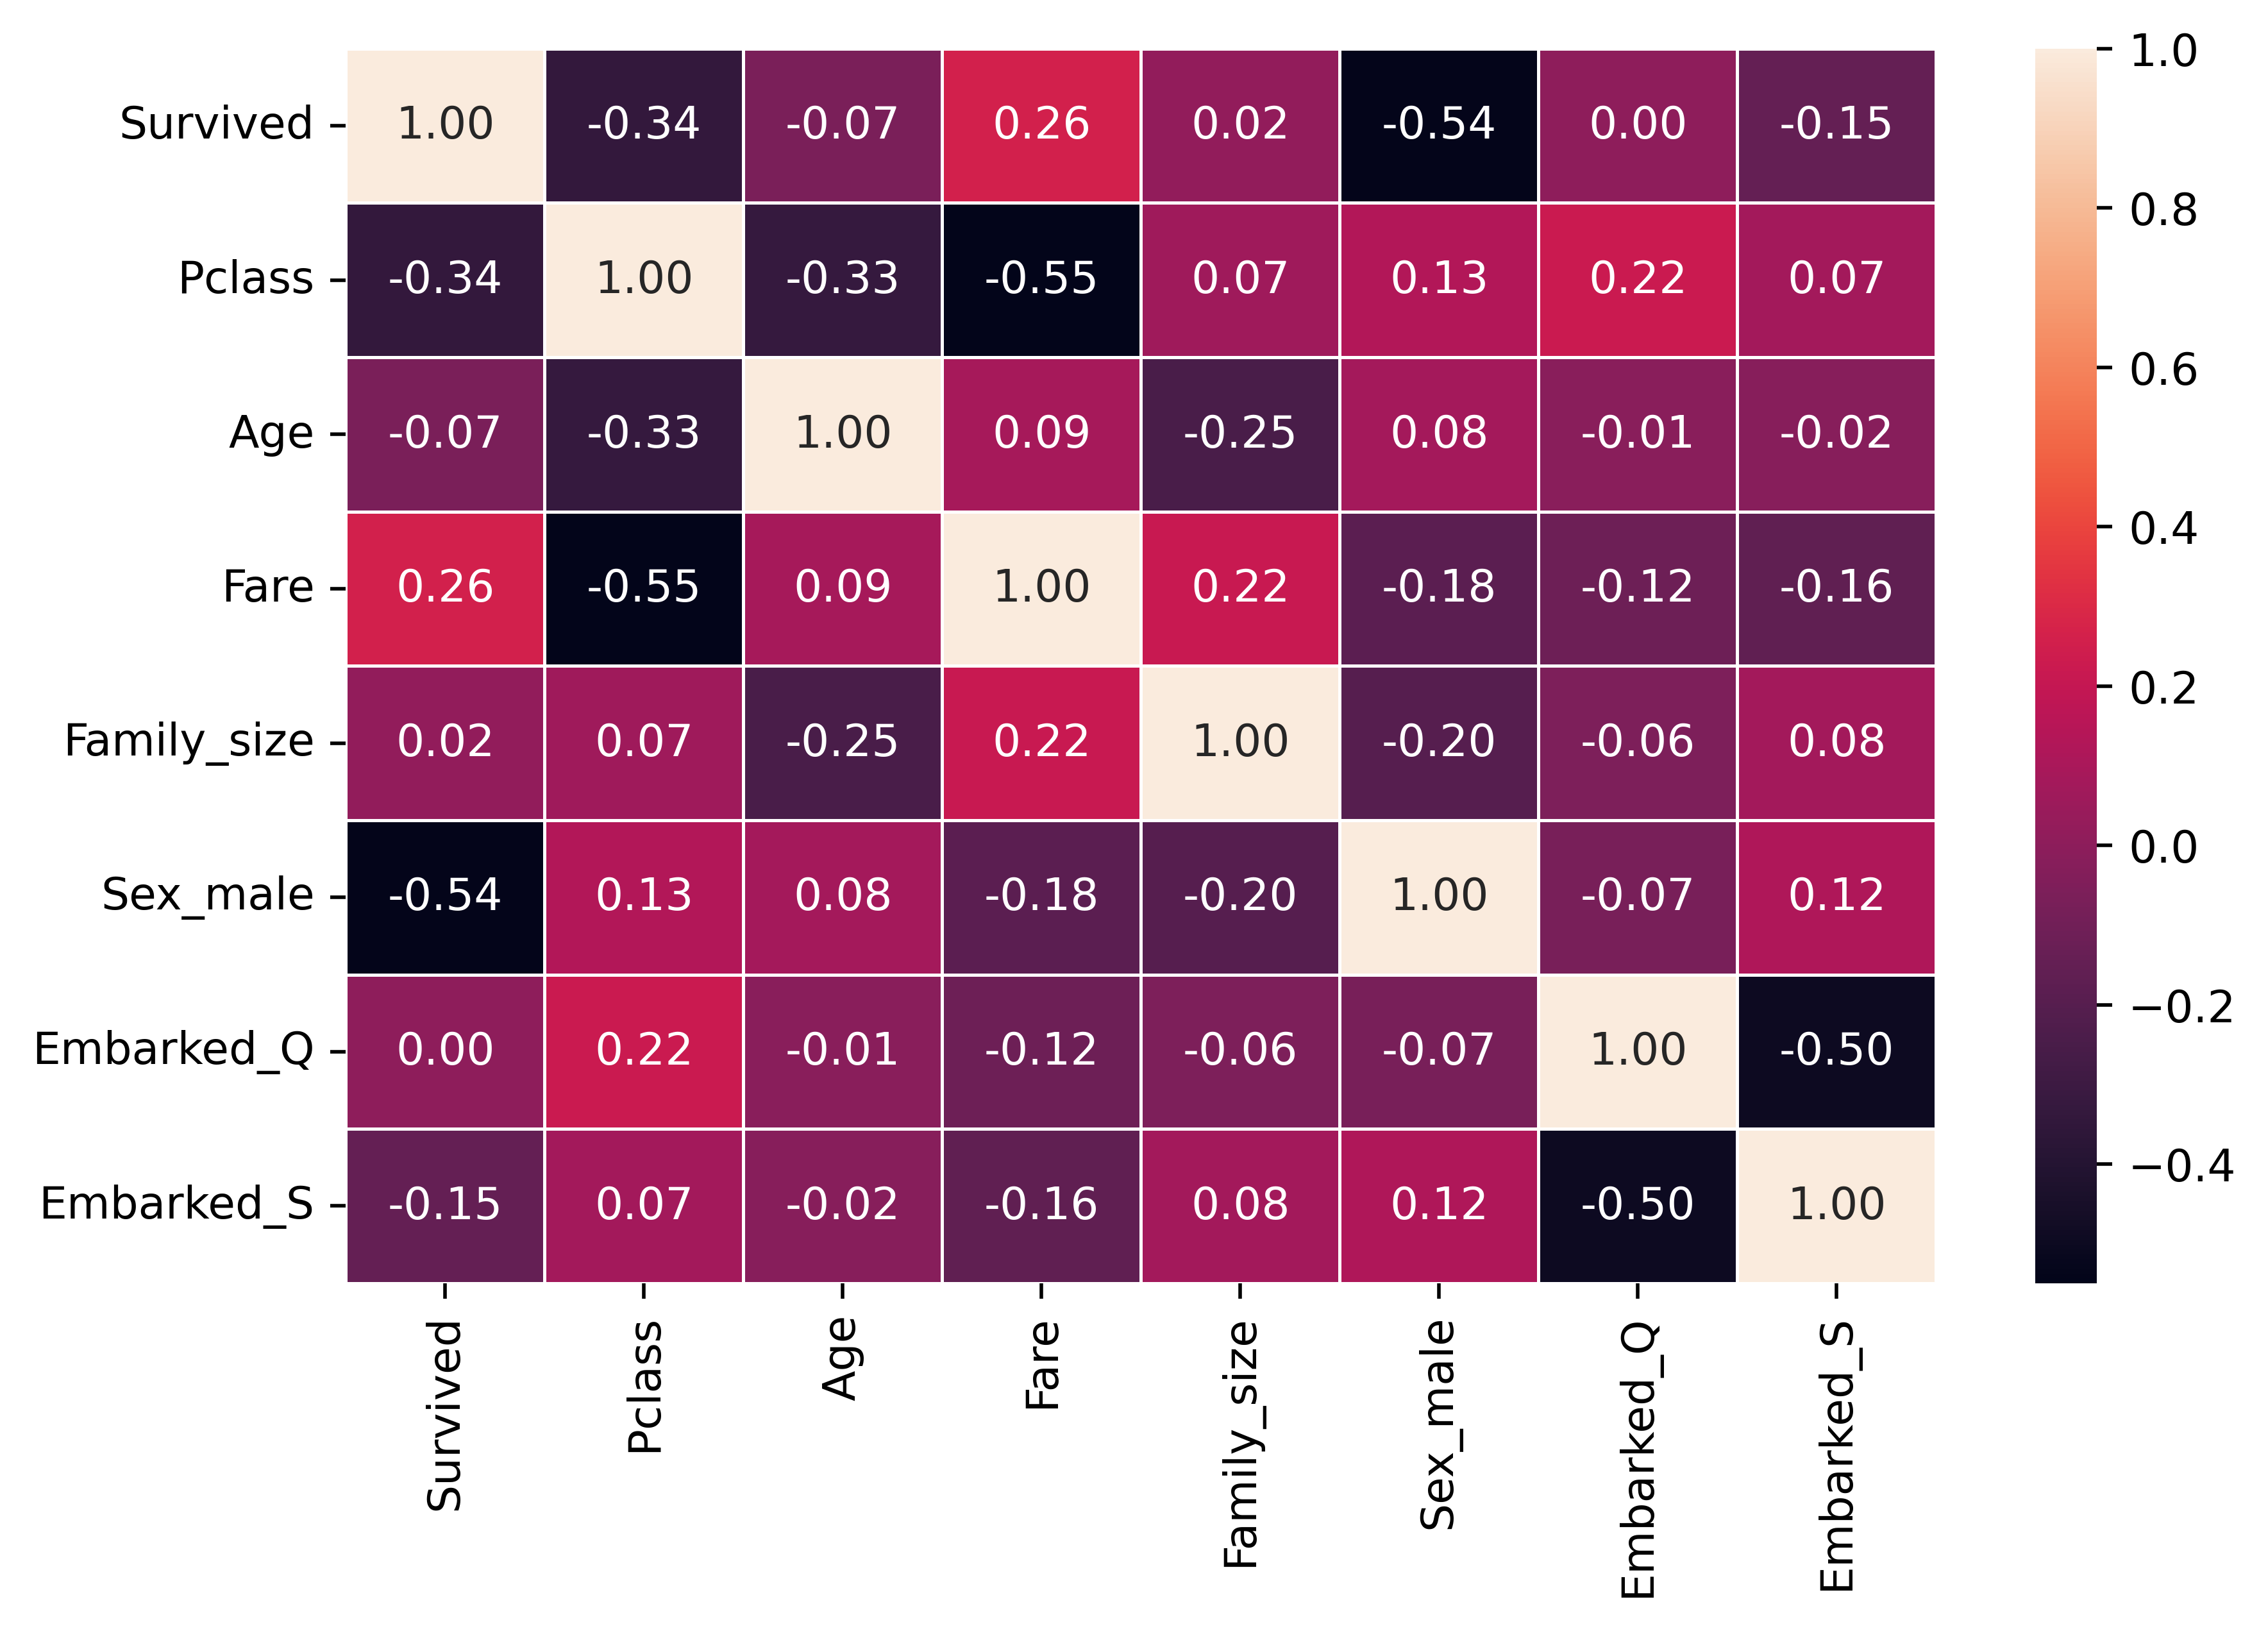

In [130]:
# Display a heatmap of the correlation matrix

corr= training_data.corr(method='pearson')
plt.figure(figsize=(8,5), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

## Model training

In [133]:
X_train = training_data.iloc[:,1:]
y_train = training_data.iloc[:,:1]

In [151]:
X_test = test_data
y_test = output_data[['Survived']]

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a RandomForestClassifier instance
clf = RandomForestClassifier()

# Define hyperparameters to tune: number of trees, maximum depth, and split quality metric
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'criterion': ['gini', 'entropy']  # Quality of split measurement
}

# Use GridSearchCV to find the best combination of hyperparameters with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a RandomForestClassifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    criterion=best_params['criterion']
)
best_rf_classifier.fit(X_train, y_train)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 150}


RandomForestClassifier(max_depth=10, n_estimators=150)

In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Make predictions on the test set using the trained decision tree classifier
y_pred = best_rf_classifier.predict(X_test)

# Calculate various evaluation metrics to assess the model's performance
accuracy = accuracy_score(y_test, y_pred)  # Overall accuracy of the model
precision = precision_score(y_test, y_pred)  # Precision of positive predictions

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.8516746411483254
Precision: 0.835820895522388


In [171]:
submission = output_data[['PassengerId']]
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [173]:
submission['Survived'] = y_pred

In [175]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [177]:
submission.to_csv('submisson.csv', index=None)